# Plot map data

**This notebook is a spinoff of the main sparkify study**. Out of the big dataset, We could calculate the distribution of users over the USA. We had to work on IBM cloud to process the data on distributed systems. 
We ran into a problem for visualization though. The IBM environment could not absorb geopandas whereas we need it for visualizing the outcomes on a 2D map visualization. This problem is the reason why this notebook exists. 

**It is meant to run in a local environment. Its purpose is to display the spatial distribution of users over the country.**

## 1. Data wrangling

- We import needed libraries

In [ ]:
import numpy as np        # linear algebra
import pandas as pd       # data processing, CSV file I/O
import geopandas as gpd   # pandas extension for map representation 
import geoplot as gplt    # map visualization
import geoplot.crs as gcrs # coordinate reference system
import sys
import os

- We load users' distribution per state and their corresponding geometric data. Both information are distributed in 2 different files so we merge them. 

In [60]:
# upload states shape dataframe from files
states_gpdf = gpd.read_file(r'data\states.json', 
                           ignore_fields=["STATE_NAME", "DRAWSEQ", "STATE_FIPS", "SUB_REGION"]) \
                                .rename(columns={"STATE_ABBR":"states"})

# we sacrifice Haway and Alaska for viewing the map better
states_gpdf = states_gpdf[~states_gpdf['states'].isin(["HI","AK"])]

# load user states distribution 
users_state_distrib_pdf = pd.read_csv(r"data\users_states_distribution.csv")

# merge both dataframes
users_state_distrib_gpdf = states_gpdf.merge(users_state_distrib_pdf, how='left', on='states')

## 2. Visualization on map

- We plot the spatial distribution of all users

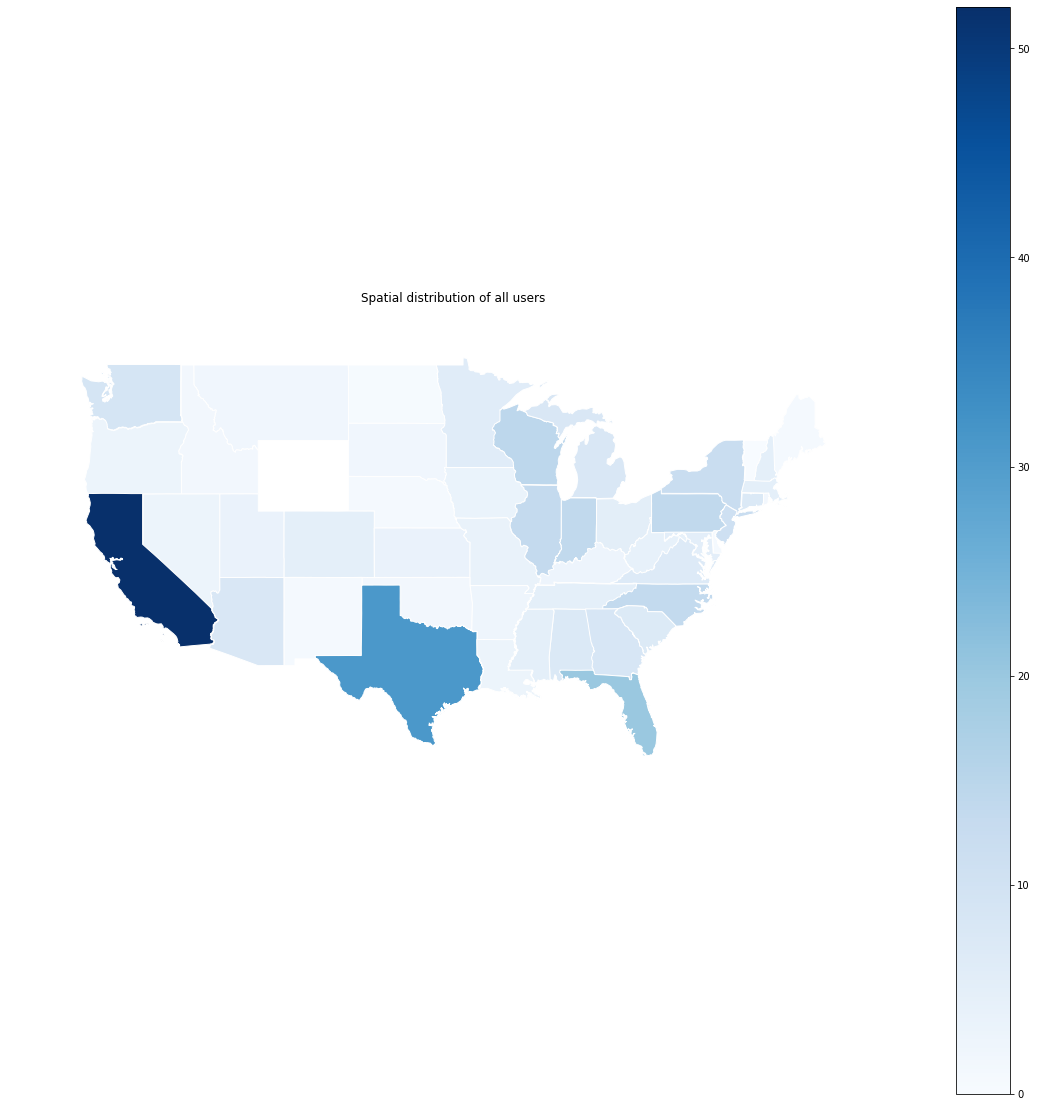

In [78]:
# choropleth mapping of listing counts to neighbourhoods
ax = gplt.choropleth(users_state_distrib_gpdf, hue='neg_weights', projection=gcrs.WebMercator(), edgecolor='white', linewidth=1, 
                cmap='Blues', legend=True, figsize=(20, 20));

ax.set_title("Spatial distribution of all users");

- We plot the spatial distribution of positive users only

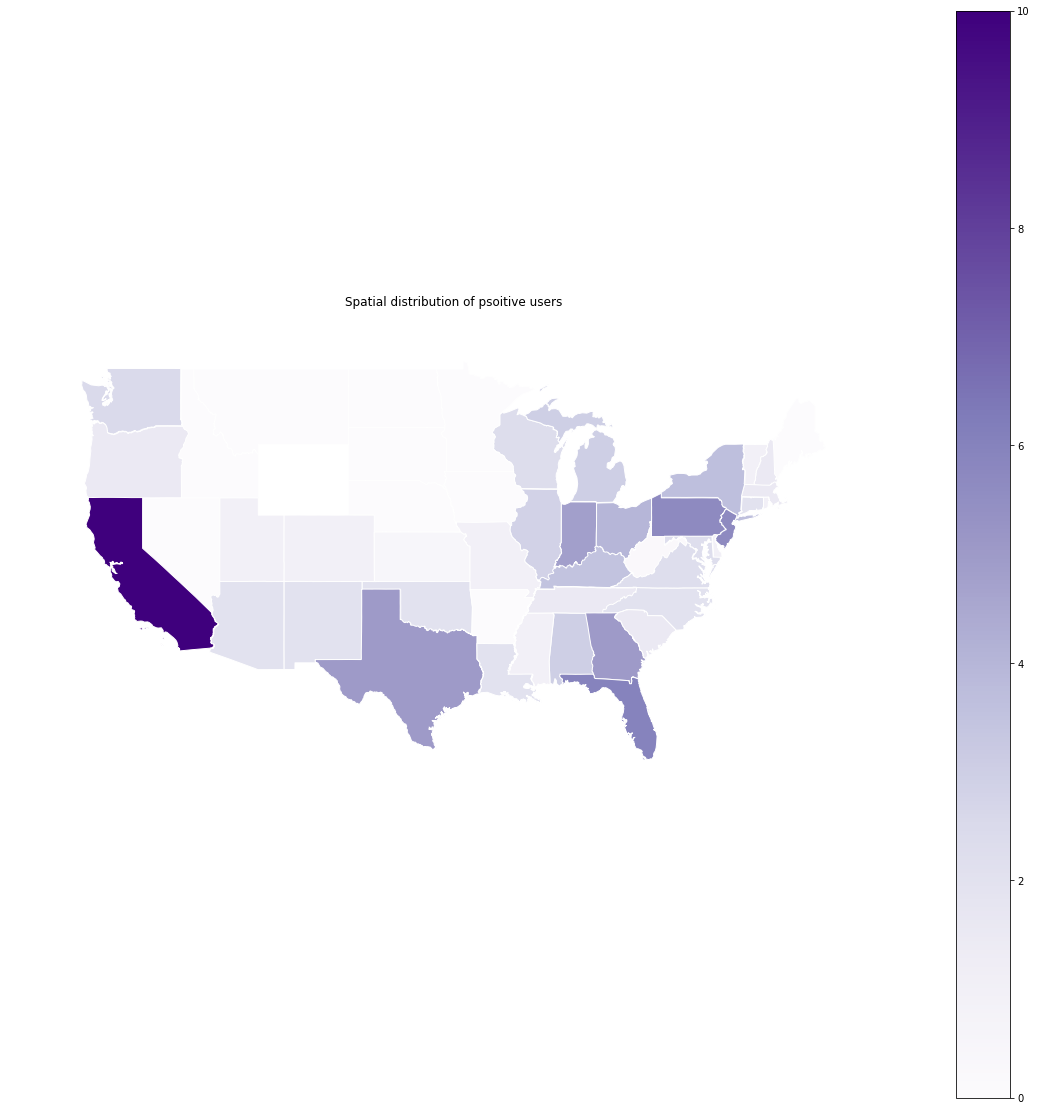

In [81]:
# choropleth mapping of listing counts to neighbourhoods
ax = gplt.choropleth(users_state_distrib_gpdf, hue='pos_weights', projection=gcrs.WebMercator(), edgecolor='white', linewidth=1, 
                cmap='Purples', legend=True, figsize=(20, 20));

ax.set_title("Spatial distribution of positive users");

- We plot the spatial distribution of churn rate

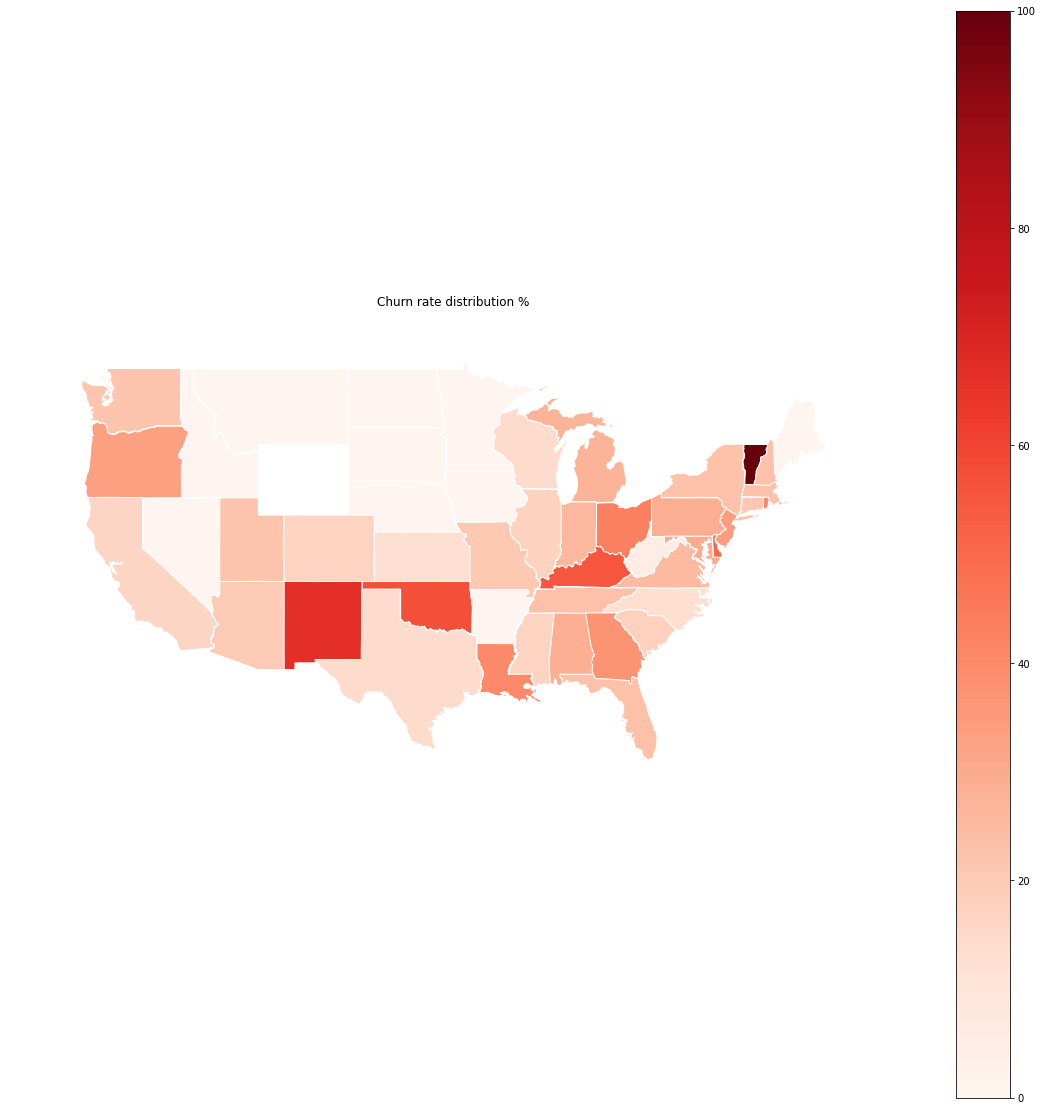

In [74]:
# choropleth mapping of listing counts to neighbourhoods
ax = gplt.choropleth(users_state_distrib_gpdf, hue='churn_percentage', projection=gcrs.WebMercator(), edgecolor='white', linewidth=1, 
                cmap='Reds', legend=True, figsize=(20, 20));

ax.set_title("Churn rate distribution %");

## 3. Summary

- The first map shows how Sparkify users are spread over the country. Most of the users are based in california and Texas. Then comes Florida, and some regions close to canada. **The number of users is quiet consistent with the natural distribution of inhabitants**. 
- The second map is not giving the contrast we want. We can only say that lots of users churn their subscription in dense areas. It seem to be obvious. 
- The third map is interesting because it reveals that **the churn rate is higher in regions where Sparkify is less popular**. It means Sparkify pain to conquer new territories/markets. 